## Observations and Insights 

1. Summary Statistics:
    The mean and the median of the data both accurately represent the data. The variance and standard deviation can be an interpretation of how effective a drug is. There would be a bigger std. deviation for those drugs that shrunk the tumors the most. On the flip side, the drugs could be ineffective and the tumors could continue to grow impacting the standard deviation for the worse. If we compare the standard deviation to the median of the sample we get a better picture of what happens. Those with higher standard deviations also have higher means and medians. This would imply that the results of the drug are less effective. The average tumor is bigger and the std. deviation is larger, this would mean the drug is inconsistent and overall ineffective at fighting cancerous tumors.

2. Quartiles and Outliers:
    Overall there is only one outlier that exists in the more refined dataframe of drug regimens. We compare two regimens with a lower mean to those with higher means and our findings from the summary statistics follows through. In a more visual look at how the data is distributed for each regimen, we can see that those with higher means have more volatile data. Those with lower means have less volatile data. We also get our only outlier in the regimen with a higher mean. These drug regimens with higher means are not effective at shrinking tumors in mice. While some have a positive response and see shrinkage others do not see any at all and some even experience tumor growth.

3. Line and Scatter Plots:
    The line chart looking at the tumor size of an individual mouse contiues to tell the same story as above. The drug Capomulin has a low average tumor size compared to our data set as well as a low standard deviation. After flipping through several different plots for diffent mice on the regimen the overall trend was negative. A majority of these mice expereinced a decrease in tumor size over the time of the trial. 
    The scatter plot also tells us a story about the mouses weight and their average tumor volume. The larger the mouse the larger the volume of the tumor. If we were to build a regression with multiple independent variables we could compare which has a greater impact on tumor shrinkage, the drug regimen or the weight of the mouse. The weight of the mouse could have a larger impact on shrinking a tumor than the particular drug regimen the mouse is on.
    

In [322]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset, combining it on Mouse ID
mouse_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
mouse_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [323]:
# Checking the number of mice.
mouse_count = mouse_data.nunique()
mouse_count['Mouse ID']


249

In [324]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_data[mouse_data.duplicated()]
duplicate_rows


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [325]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_data[mouse_data['Mouse ID'] == 'g989']
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [291]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data[mouse_data['Mouse ID'] != 'g989']
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [292]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_mouse_data['Mouse ID'].nunique()
mouse_count

248

## Summary Statistics

In [293]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Find the mean tumore volume
drug_df = clean_mouse_data.groupby(['Drug Regimen'])
drug_avg = drug_df.mean()
drug_avg = drug_avg.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)'], axis=1)
drug_avg = drug_avg.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})

# Find the median tumor volume
drug_med = drug_df.median()
drug_med = drug_med.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)'], axis=1)
drug_med = drug_med.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'})

# Find the volume variance
drug_var = drug_df.var()
drug_var = drug_var.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)'], axis=1)
drug_var = drug_var.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Variance'})

# Find volume std deviation
drug_std = drug_df.std()
drug_std = drug_std.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)'], axis=1)
drug_std = drug_std.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Dev.'})

# Find volume std. err. 
drug_sem = drug_df.sem()
drug_sem = drug_sem.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)'], axis=1)
drug_sem = drug_sem.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Err.'})

# Combine them all into one DataFrame
summ_table = pd.merge(drug_avg, drug_med, on='Drug Regimen')
summ_table = pd.merge(summ_table, drug_var, on='Drug Regimen')
summ_table = pd.merge(summ_table, drug_std, on='Drug Regimen')
summ_table = pd.merge(summ_table, drug_sem, on='Drug Regimen')

# Print the summary table
summ_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [294]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_summ_table = clean_mouse_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
# Using the aggregation method, produce the same summary statistics in a single line
clean_summ_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

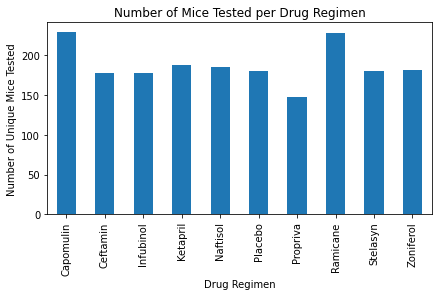

In [321]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_drug = drug_df.count()
mice_per_drug = mice_per_drug.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)','Mouse ID','Sex'], axis=1)
mice_per_drug.plot(kind='bar',legend=False)
plt.tight_layout()
plt.ylabel('Number of Unique Mice Tested')
plt.title('Number of Mice Tested per Drug Regimen')
plt.show()


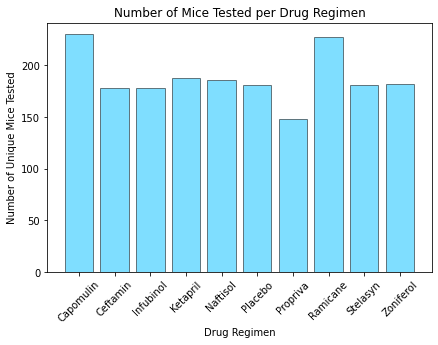

In [320]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_per_drug = mice_per_drug.reset_index()
plt.bar(mice_per_drug['Drug Regimen'], mice_per_drug['Tumor Volume (mm3)'], color = 'deepskyblue', alpha=0.5, edgecolor = 'black')
plt.tight_layout()
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.title('Number of Mice Tested per Drug Regimen')
plt.show()

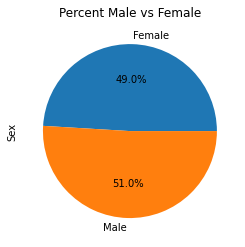

In [319]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_mouse_data.groupby('Sex')
gender_group = gender_group.count()
gender_group = gender_group.drop(['Timepoint','Metastatic Sites','Age_months','Weight (g)','Mouse ID','Drug Regimen'], axis=1)
gender_group.plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.title('Percent Male vs Female')
plt.show()


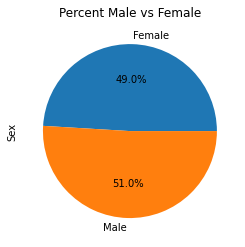

In [318]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group = gender_group.reset_index()
plt.pie(gender_group['Tumor Volume (mm3)'], labels = gender_group['Sex'], autopct='%1.1f%%')
plt.ylabel('Sex')
plt.title('Percent Male vs Female')
plt.show()


## Quartiles, Outliers and Boxplots

In [299]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
lim_reg = clean_mouse_data[(clean_mouse_data['Drug Regimen'] == 'Capomulin') | (clean_mouse_data['Drug Regimen'] == 'Ramicane') | (clean_mouse_data['Drug Regimen'] == 'Infubinol') | (clean_mouse_data['Drug Regimen'] == 'Ceftamin')]
lim_reg_tumor = lim_reg.groupby(['Drug Regimen', 'Mouse ID']).agg(Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
lim_reg_tumor
# Start by getting the last (greatest) timepoint for each mouse
lim_reg_df = lim_reg_tumor.reset_index()
lim_reg_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lim_reg_clean = lim_reg_tumor.stack(level=0).unstack(level=0)
lim_reg_clean
lim_reg_clean.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [300]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
lower_bound_list = []
upper_bound_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# Determine outliers using upper and lower bounds
for drug in drugs:
    quartiles = lim_reg_clean[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = (upperq-lowerq).round(2)
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    lower_bound_list.append(lowerq - (1.5*iqr))
    upper_bound_list.append(upperq + (1.5*iqr))
    tumor_vol.append(list(lim_reg_clean[drug].dropna()))
    print('--------------------------------------------------')
    print(f"{drug} Quartiles and Outliers")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

# Determine outliers using upper and lower bounds
print('--------------------------------------------------')
print('Potential Outliers')
for tumor in tumor_vol[0]:    
    if (tumor > upper_bound_list[0]) | (tumor < lower_bound_list[0]):
        print(f"Capomulin's potential outliers: {tumor}")
for tumor in tumor_vol[1]:    
    if (tumor > upper_bound_list[1]) | (tumor < lower_bound_list[1]):
        print(f"Ramicane's potential outliers: {tumor}")
for tumor in tumor_vol[2]:    
    if (tumor > upper_bound_list[2]) | (tumor < lower_bound_list[2]):
        print(f"Infubinol's potential outliers: {tumor}")
for tumor in tumor_vol[3]:    
    if (tumor > upper_bound_list[3]) | (tumor < lower_bound_list[3]):
        print(f"Ceftamin's potential outliers: {tumor}")


--------------------------------------------------
Capomulin Quartiles and Outliers
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
--------------------------------------------------
Ramicane Quartiles and Outliers
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
--------------------------------------------------
Infubinol Quartiles and Outliers
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
------------------

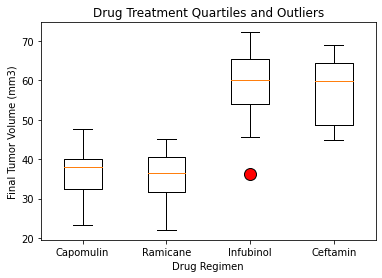

In [317]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest\
flierprops = dict(marker = 'o', markerfacecolor = 'r', markersize=12)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Drug Treatment Quartiles and Outliers')
ax1.boxplot(tumor_vol, flierprops=flierprops)
plt.xticks([1,2,3,4], drugs)
plt.show()

## Line and Scatter Plots

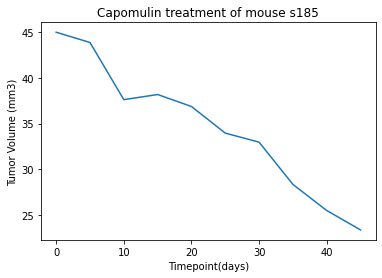

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
228,s185,0,45.000000,0,Capomulin,Female,3,17
447,s185,5,43.878496,0,Capomulin,Female,3,17
671,s185,10,37.614948,0,Capomulin,Female,3,17
714,s185,15,38.177232,0,Capomulin,Female,3,17
968,s185,20,36.866876,0,Capomulin,Female,3,17
1196,s185,25,33.949940,0,Capomulin,Female,3,17
1377,s185,30,32.959671,1,Capomulin,Female,3,17
1479,s185,35,28.328531,1,Capomulin,Female,3,17
1652,s185,40,25.472143,1,Capomulin,Female,3,17
1849,s185,45,23.343598,1,Capomulin,Female,3,17


In [332]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Find a mouse, using
cap_mice = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']
cap_mouse = cap_mice[cap_mice['Mouse ID'] == 's185']


# Create axises for mouse # i557
x_axis = cap_mouse['Timepoint']
cap_mouse_tumor = cap_mouse['Tumor Volume (mm3)']

# Create plot
plt.plot(x_axis, cap_mouse_tumor)
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse s185')
plt.show()
cap_mouse

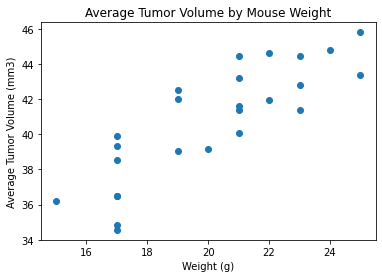

In [315]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Groupby weight and determine average tumor volume
avg_cap_tumor = cap_mice.groupby(['Mouse ID'])
avg_cap_tumor = avg_cap_tumor.mean()
avg_cap_tumor = avg_cap_tumor.reset_index()
avg_cap_tumor

# Plot the data
plt.scatter(avg_cap_tumor['Weight (g)'], avg_cap_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Mouse Weight')
plt.show()

#Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.7088568047708717
y = 0.95x + 21.55


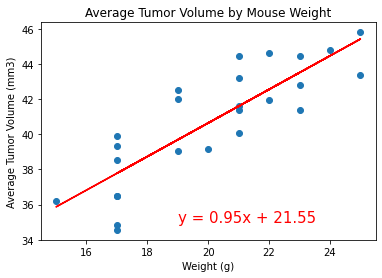

In [316]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Remake the plot from above
plt.scatter(avg_cap_tumor['Weight (g)'], avg_cap_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Mouse Weight')

# calculate correlation coefficient
avg_cap = avg_cap_tumor.iloc[:,2]
weight = avg_cap_tumor.iloc[:,5]
correlation = st.pearsonr(weight,avg_cap)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

# add the regression and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_cap)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(19,35),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

